In [50]:
# libraries 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [2]:
# 1. Load the dataset and display the first 5 row

df=pd.read_csv(r"ai_assistant_usage_student_life.csv")
df.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9


In [3]:
# 2. Check the dataset shape (rows, columns)
df.shape

(10000, 11)

In [4]:
#3. Display column names and their data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SessionID           10000 non-null  object 
 1   StudentLevel        10000 non-null  object 
 2   Discipline          10000 non-null  object 
 3   SessionDate         10000 non-null  object 
 4   SessionLengthMin    10000 non-null  float64
 5   TotalPrompts        10000 non-null  int64  
 6   TaskType            10000 non-null  object 
 7   AI_AssistanceLevel  10000 non-null  int64  
 8   FinalOutcome        10000 non-null  object 
 9   UsedAgain           10000 non-null  bool   
 10  SatisfactionRating  10000 non-null  float64
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 791.1+ KB


In [5]:
#4. Check for missing values in each column.
missing=df.isnull().sum()
print (missing)

SessionID             0
StudentLevel          0
Discipline            0
SessionDate           0
SessionLengthMin      0
TotalPrompts          0
TaskType              0
AI_AssistanceLevel    0
FinalOutcome          0
UsedAgain             0
SatisfactionRating    0
dtype: int64


In [6]:
#5. Show summary statistics for SessionLengthMin and TotalPrompts.
print (df[["SessionLengthMin","TotalPrompts"]].describe())

       SessionLengthMin  TotalPrompts
count      10000.000000  10000.000000
mean          19.846467      5.607500
std           13.897302      4.648764
min            0.030000      1.000000
25%            9.630000      2.000000
50%           16.650000      4.000000
75%           26.670000      8.000000
max          110.810000     39.000000


In [7]:
#6. Find the number of unique values in StudentLevel, Discipline, and TaskType.
print ("Unique values in studentlevel:",df["StudentLevel"].unique())
print ("Unique values in Discipline:",df["Discipline"].unique())
print ("Unique values in Taktype:",df["TaskType"].unique())

Unique values in studentlevel: ['Undergraduate' 'Graduate' 'High School']
Unique values in Discipline: ['Computer Science' 'Psychology' 'Business' 'Biology' 'Math' 'History'
 'Engineering']
Unique values in Taktype: ['Studying' 'Coding' 'Writing' 'Brainstorming' 'Homework Help' 'Research']


In [8]:
#7. Which TaskType is the most common?
df["TaskType"].value_counts()

TaskType
Writing          3101
Studying         2040
Homework Help    1959
Coding           1948
Brainstorming     476
Research          476
Name: count, dtype: int64

The common task is writing

In [9]:
#8. Calculate the average SessionLengthMin for each StudentLevel.
average_session=df.groupby("StudentLevel")["SessionLengthMin"].mean()
print(average_session)

StudentLevel
Graduate         20.252236
High School      20.023740
Undergraduate    19.650943
Name: SessionLengthMin, dtype: float64


Part B: Visualization

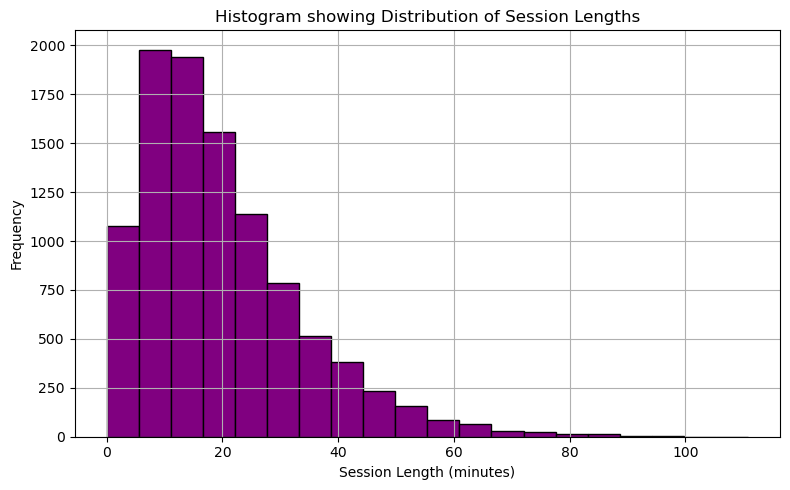

In [10]:
#9. Plot a histogram of SessionLengthMin.
plt.figure(figsize=(8, 5))
plt.hist(df['SessionLengthMin'], bins=20, color='purple', edgecolor='black')
plt.title('Histogram showing Distribution of Session Lengths')
plt.xlabel('Session Length (minutes)')
plt.ylabel('Frequency')
plt.grid(True) # adds grids for visual structure
plt.tight_layout()
plt.show()

# - The distribution is right-skewed, meaning most sessions are short, with fewer long ones.
# Peak Frequency: The highest number of sessions fall in the 5-15 minute range, suggesting quick interactions are the norm.
#  As session length increases, the frequency drops steadily.

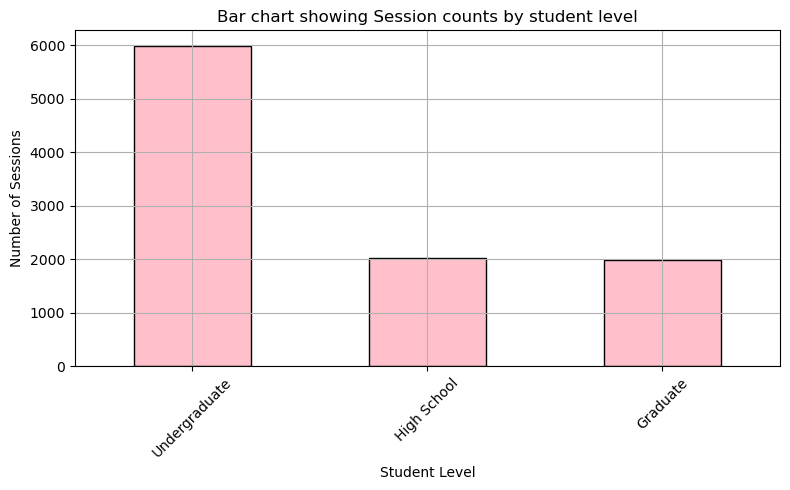

In [11]:
#10. Create a bar chart of session counts by StudentLevel.

student_session_counts= df["StudentLevel"].value_counts()

plt.figure (figsize=(8,5))
student_session_counts.plot(kind='bar', color='pink', edgecolor='black')

plt.title ('Bar chart showing Session counts by student level')
plt.xlabel ('Student Level')
plt.ylabel ('Number of Sessions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

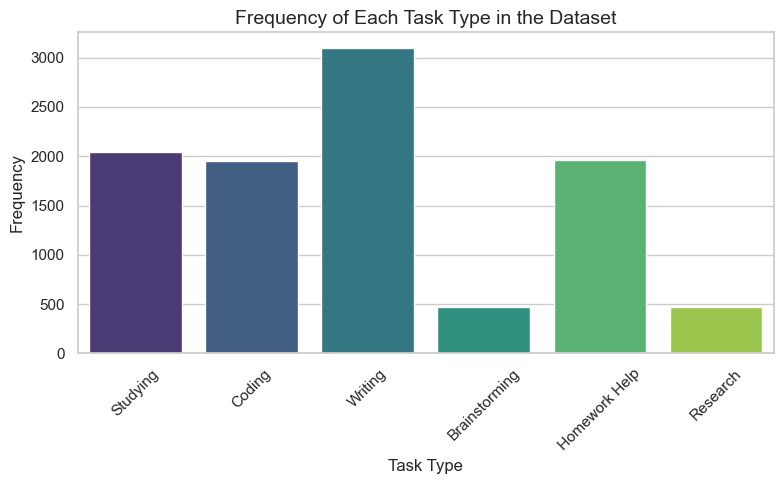

In [12]:
#11. Make a countplot of TaskType using Seaborn.

sns.set(style='whitegrid')


plt.figure(figsize=(8, 5))
sns.countplot(data=df, hue='TaskType', x='TaskType', palette='viridis')
plt.xlabel('Task Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Frequency of Each Task Type in the Dataset', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


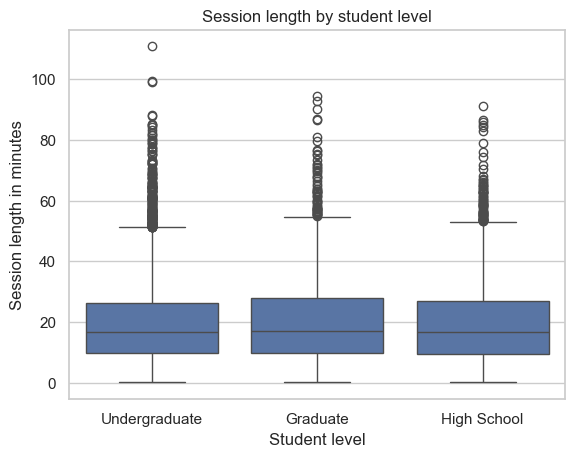

In [13]:
#Plot a boxplot of SessionLengthMin grouped by StudentLevel.
plt.Figure(figsize=(6,4))
sns.boxplot(x="StudentLevel", y="SessionLengthMin",data=df)
plt.xlabel("Student level")
plt.ylabel("Session length in minutes")
plt.title("Session length by student level")
plt.show()

# Graduate and Undergraduate students have a wide spread, meaning some study for just a few minutes, while others go much longer.
# High School students have a narrow spread, so most of them tend to study for about the same amount of time—less variation.

In [14]:
# 13. Create a pie chart showing proportions of FinalOutcome.
finaloutcome_counts=df["FinalOutcome"].value_counts()
print (finaloutcome_counts)

FinalOutcome
Assignment Completed    4768
Idea Drafted            2866
Confused                1613
Gave Up                  753
Name: count, dtype: int64


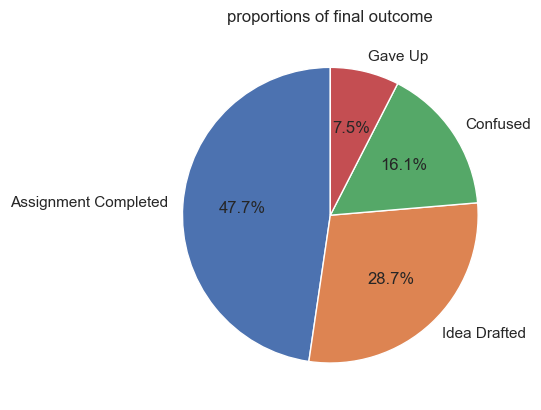

In [15]:
plt.Figure(figsize=(6,8))
plt.pie(finaloutcome_counts,labels=finaloutcome_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("proportions of final outcome")
plt.show()

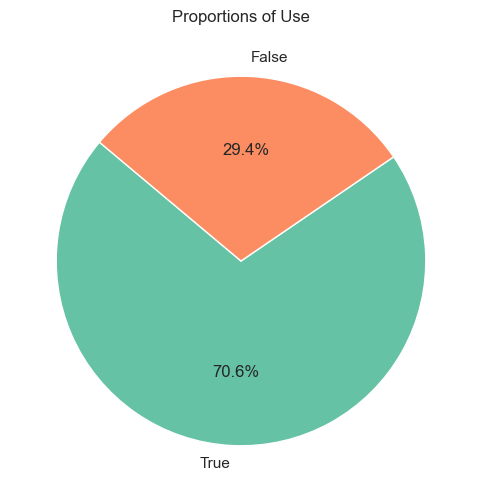

In [16]:
used_again = df['UsedAgain'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(used_again, labels=used_again.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set2.colors)

# Add a title
plt.title('Proportions of Use')
plt.tight_layout
plt.show ()

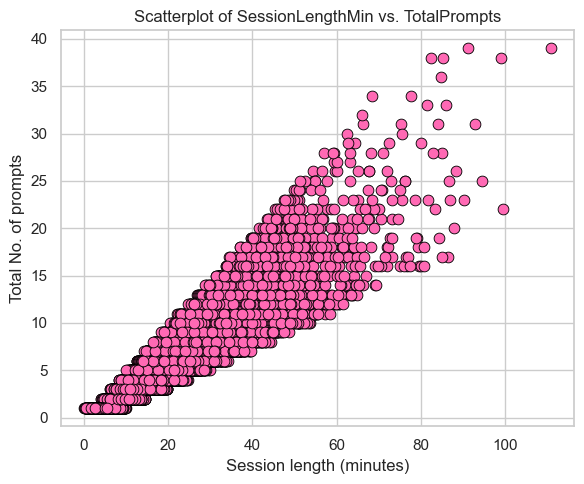

In [17]:
# 14. Draw a scatterplot of SessionLengthMin vs. TotalPrompts.
sns.set_style ('whitegrid')
plt.figure (figsize= (6,5))

sns.scatterplot (data=df, x='SessionLengthMin', y='TotalPrompts', s=60, color='hotpink', edgecolor='black')

plt.xlabel ('Session length (minutes)')
plt.ylabel ('Total No. of prompts')
plt.title ('Scatterplot of SessionLengthMin vs. TotalPrompts')
plt.tight_layout()
plt.show ()

# As session length increases, the number of prompts also tends to increase. (users who stay longer are more engaged)

In [18]:
#15. Plot a line chart of average AI_AssistanceLevel over time (SessionDate).

average_ai_assistance=df.groupby("SessionDate")["AI_AssistanceLevel"].mean()
print (average_ai_assistance)

SessionDate
2024-06-24    3.451613
2024-06-25    3.181818
2024-06-26    3.500000
2024-06-27    3.428571
2024-06-28    3.826087
                ...   
2025-06-20    3.459459
2025-06-21    3.146341
2025-06-22    3.200000
2025-06-23    3.272727
2025-06-24    3.515152
Name: AI_AssistanceLevel, Length: 366, dtype: float64


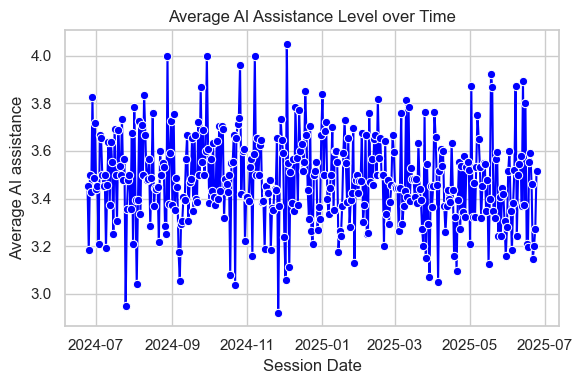

In [21]:
# 15. plot a chart of average AI_AssistanceLevel over time (SessionDate).

df['SessionDate'] = pd.to_datetime(df['SessionDate'], errors='coerce')
average_assistance=df.groupby ('SessionDate')['AI_AssistanceLevel'].mean().reset_index()

sns.set_style ('whitegrid')
plt.figure(figsize=(6, 4))
sns.lineplot (data=average_assistance, x='SessionDate', y='AI_AssistanceLevel', marker='o', color='blue')

plt.xlabel ('Session Date')
plt.ylabel ('Average AI assistance')
plt.title ('Average AI Assistance Level over Time')
plt.tight_layout()
plt.show()

# most assistance between 3.2 and 3.8 () AI assistance level has been fairly stable over time).

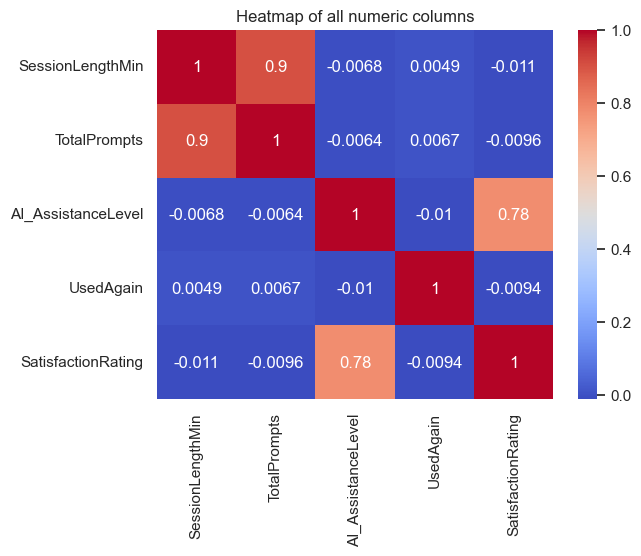

In [22]:
#16. Create a heatmap of correlations among numeric features.
correlation_matrix=df.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot=True,cmap="coolwarm")
plt.title("Heatmap of all numeric columns")
plt.show()

# no strong linear relationships with each other. (longer sessions don’t lead to more prompts, more AI help doesn’t lead to higher satisfaction?)

Part C: GroupBy & Aggregations

In [23]:
#17. Find the average SessionLengthMin for each TaskType.
average_sessionlength_per_task=df.groupby("TaskType")["SessionLengthMin"].mean()
print ('The average time spent on each task is as follows:')
print (average_sessionlength_per_task)


The average time spent on each task is as follows:
TaskType
Brainstorming    21.964223
Coding           19.467659
Homework Help    19.940536
Research         20.410000
Studying         19.705917
Writing          19.705888
Name: SessionLengthMin, dtype: float64


In [24]:
#18. Which Discipline had the most sessions?
discipline_counts = df['Discipline'].value_counts()
most_sessions_discipline = discipline_counts.idxmax()
most_sessions_count = discipline_counts.max()

print("Discipline with most sessions:", most_sessions_discipline)
print("Number of sessions:", most_sessions_count)

Discipline with most sessions: Biology
Number of sessions: 1458


In [25]:
#19. Compare average AI_AssistanceLevel across StudentLevel.
average_AI_per_level=df.groupby("StudentLevel")["AI_AssistanceLevel"].mean().reset_index()
print (average_AI_per_level)

    StudentLevel  AI_AssistanceLevel
0       Graduate            3.469674
1    High School            3.477060
2  Undergraduate            3.483607


In [26]:
#20. Find the most common FinalOutcome for Graduate students

graduate_outcome_counted = df[df["StudentLevel"] == "Graduate"]["FinalOutcome"].value_counts()

most_common_graduate_outcome = graduate_outcome_counted.idxmax()
most_common_graduate_count = graduate_outcome_counted.max()

print("Most common FinalOutcome for Graduate students is:", most_common_graduate_outcome)
print("Count:", most_common_graduate_count)


Most common FinalOutcome for Graduate students is: Assignment Completed
Count: 936


In [27]:
#21. Calculate the median SessionLengthMin for each FinalOutcome.
median_sessionlength=df.groupby("FinalOutcome")["SessionLengthMin"].median()
median_sessionlength

FinalOutcome
Assignment Completed    16.570
Confused                16.040
Gave Up                 17.290
Idea Drafted            17.085
Name: SessionLengthMin, dtype: float64

In [28]:
#22. Convert SessionDate into Year, Month, and Day columns.

df["SessionDate"]= pd.to_datetime(df["SessionDate"])

df["Year"]=df["SessionDate"].dt.year
df["Month"]=df["SessionDate"].dt.month
df["Day"]= df["SessionDate"].dt.day

# Preview
print(df[['SessionDate', 'Year', 'Month', 'Day']].head())

  SessionDate  Year  Month  Day
0  2024-11-03  2024     11    3
1  2024-08-25  2024      8   25
2  2025-01-12  2025      1   12
3  2025-05-06  2025      5    6
4  2025-03-18  2025      3   18


Feature Engineering & Encoding

In [29]:
#23. Encode StudentLevel using Label Encoding.

# 23. Encode StudentLevel using Label Encoding.----(used to convert categorical data into a numerical format suitable for machine learning models).
from sklearn.preprocessing import LabelEncoder

# initialize and fit
le = LabelEncoder() # - designed to convert categorical labels into numeric form

# apply 
df['StudentLevel_encoded'] = le.fit_transform(df['StudentLevel'])  # fit: Scans the StudentLevel column to learn all unique categories. transform: Converts each category into a numeric label.
# preview
print(df[['StudentLevel', 'StudentLevel_encoded']].head(10))

    StudentLevel  StudentLevel_encoded
0  Undergraduate                     2
1  Undergraduate                     2
2  Undergraduate                     2
3  Undergraduate                     2
4  Undergraduate                     2
5       Graduate                     0
6    High School                     1
7  Undergraduate                     2
8  Undergraduate                     2
9  Undergraduate                     2


In [30]:
from sklearn.preprocessing import OneHotEncoder

In [31]:
#24. Apply One-Hot Encoding to TaskType.
# One Hot Encoding is a method for converting categorical variables into a binary format (like TaskType, StudentLevel, etc.) that have multiple categories. 
# It creates new columns for each category where 1 means the category is present and 0 means it is not. 
# The primary purpose of One Hot Encoding is to ensure that categorical data can be effectively used

df_encoded_tasktype=pd.get_dummies(df["TaskType"],drop_first= True)
df_encoded_tasktype.head(5)



,Coding,Homework Help,Research,Studying,Writing
0,False,False,False,True,False
1,False,False,False,True,False
2,True,False,False,False,False
3,True,False,False,False,False
4,False,False,False,False,True


In [32]:
#25. Create a new feature: PromptsPerMinute = TotalPrompts / SessionLengthMin.
df["PromptsPerMinute"]=df["TotalPrompts"]/df["SessionLengthMin"]

# preview
print(df[['TotalPrompts', 'SessionLengthMin', 'PromptsPerMinute']].head())

   TotalPrompts  SessionLengthMin  PromptsPerMinute
0            11             31.20          0.352564
1             6             13.09          0.458365
2             5             19.22          0.260146
3             1              3.70          0.270270
4             9             28.12          0.320057


In [33]:
#26. Bin SessionLengthMin into categories: Short, Medium, Long.
# bins, labels 
bins = [0, 10, 30, float('inf')] 
labels = ['Short', 'Medium', 'Long']

# new binned column
df['SessionLengthCategory'] = pd.cut(df['SessionLengthMin'], bins=bins, labels=labels, right=False)

# preview
print(df[['SessionLengthMin', 'SessionLengthCategory']].head())

   SessionLengthMin SessionLengthCategory
0             31.20                  Long
1             13.09                Medium
2             19.22                Medium
3              3.70                 Short
4             28.12                Medium


Machine Learning (Classification Models)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [35]:
# Drop the datetime column
df = df.drop("SessionDate", axis=1)

# 1. Separate features and target
X = df.drop("FinalOutcome", axis=1)
y = df["FinalOutcome"]

# 2. Encode target
le = LabelEncoder()
y = le.fit_transform(y)   # FinalOutcome is now numeric

# 3. Encode features (get_dummies for categorical features)
X = pd.get_dummies(X, drop_first=True)

In [36]:
##train data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [37]:
#train decision tree
tree= DecisionTreeClassifier(max_depth=3)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [38]:
#make the predictions
y_pred=tree.predict(X_test)

In [39]:
#evaluate the model
print("Accuracy:",accuracy_score(y_test,y_pred))
print("\nClassification Report:\n", classification_report(y_test,y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y_pred))

Accuracy: 0.486

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.89      0.64       930
           1       0.41      0.40      0.41       349
           2       0.00      0.00      0.00       170
           3       0.29      0.01      0.02       551

    accuracy                           0.49      2000
   macro avg       0.30      0.33      0.27      2000
weighted avg       0.39      0.49      0.37      2000


Confusion Matrix:
 [[826  96   0   8]
 [206 141   0   2]
 [109  59   0   2]
 [502  44   0   5]]


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [40]:
#Predict UsedAgain using Logistic Regression.

# Split features (X) and target (y)
X1 = df.drop("UsedAgain", axis=1)
y1 = df["UsedAgain"]

# Step 2: Encode target if categorical
le = LabelEncoder()
y1 = le.fit_transform(y1)   # 0/1

# Step 3: Encode categorical features
X1 = pd.get_dummies(X1, drop_first=True)

# Step 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X1, y1, test_size=0.2, random_state=42, stratify=y
)

# Step 5: Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Step 6: Predictions
y_pred = log_reg.predict(X_test)

# Step 7: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.762

Confusion Matrix:
 [[ 276  306]
 [ 170 1248]]

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.47      0.54       582
           1       0.80      0.88      0.84      1418

    accuracy                           0.76      2000
   macro avg       0.71      0.68      0.69      2000
weighted avg       0.75      0.76      0.75      2000



In [41]:
#Train a Random Forest Classifier to predict FinalOutcome
x2=df.drop("FinalOutcome", axis=1)
y2=df["FinalOutcome"]

#encode target if its categorical
encode=LabelEncoder()
y2= encode.fit_transform(y2)

#encode categorical features
x2=pd.get_dummies(x2, drop_first=True)

#train dataset
X_train,X_test, y_train, y_test=train_test_split(x2,y2, test_size=0.2, random_state=42)

#train random forest classifier
rfd= RandomForestClassifier(n_estimators=100, random_state=42)
rfd.fit(X_train,y_train)

#make predictions
y2_pred=rfd.predict(X_test)

##make evaluations
#evaluate the model
print("Accuracy:",accuracy_score(y_test,y2_pred))
print("\nClassification Report:\n", classification_report(y_test,y2_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y2_pred))


Accuracy: 0.4675

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.87      0.63       930
           1       0.39      0.15      0.21       349
           2       0.00      0.00      0.00       170
           3       0.35      0.14      0.20       551

    accuracy                           0.47      2000
   macro avg       0.31      0.29      0.26      2000
weighted avg       0.39      0.47      0.38      2000


Confusion Matrix:
 [[808  39   2  81]
 [262  52   1  34]
 [125  22   0  23]
 [453  22   1  75]]


In [42]:
##Use KNN (K-Nearest Neighbors) to classify UsedAgain.
from sklearn.neighbors import KNeighborsClassifier

# Split features (X) and target (y)
X1 = df.drop("UsedAgain", axis=1)
y1 = df["UsedAgain"]

# Step 2: Encode target if categorical
le = LabelEncoder()
y1 = le.fit_transform(y1)   # 0/1

# Step 3: Encode categorical features
X1 = pd.get_dummies(X1, drop_first=True)

# Step 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X1, y1, test_size=0.2, random_state=42
)

# Step 5: Train K-Nearest Neighbours
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

# Step 6: Predictions
y_pred = knn.predict(X_test)

# Step 7: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6485

Confusion Matrix:
 [[  92  523]
 [ 180 1205]]

Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.15      0.21       615
           1       0.70      0.87      0.77      1385

    accuracy                           0.65      2000
   macro avg       0.52      0.51      0.49      2000
weighted avg       0.59      0.65      0.60      2000



In [43]:
#Train a Naive Bayes Classifier to predict FinalOutcome.
from sklearn.naive_bayes import GaussianNB

x2=df.drop("FinalOutcome", axis=1)
y2=df["FinalOutcome"]

#encode target if its categorical
encode=LabelEncoder()
y2= encode.fit_transform(y2)

#encode categorical features
x2=pd.get_dummies(x2, drop_first=True)

#train dataset
X_train,X_test, y_train, y_test=train_test_split(x2,y2, test_size=0.2, random_state=42)

#Train Naive Bayes
nb= GaussianNB ()
nb.fit(X_train, y_train)

#make predictions
y2_pred=nb.predict(X_test)

##make evaluations
#evaluate the model
print("Accuracy:",accuracy_score(y_test,y2_pred))
print("\nClassification Report:\n", classification_report(y_test,y2_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y2_pred))



Accuracy: 0.085

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       930
           1       0.00      0.00      0.00       349
           2       0.09      1.00      0.16       170
           3       0.00      0.00      0.00       551

    accuracy                           0.09      2000
   macro avg       0.02      0.25      0.04      2000
weighted avg       0.01      0.09      0.01      2000


Confusion Matrix:
 [[  0   0 930   0]
 [  0   0 349   0]
 [  0   0 170   0]
 [  0   1 550   0]]


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [44]:
#Build a Gradient Boosting Classifier for UsedAgain.

from sklearn.ensemble import GradientBoostingClassifier
# Split features (X) and target (y)
X1 = df.drop("UsedAgain", axis=1)
y1 = df["UsedAgain"]

# Step 2: Encode target if categorical
le = LabelEncoder()
y1 = le.fit_transform(y1)   # 0/1

# Step 3: Encode categorical features
X1 = pd.get_dummies(X1, drop_first=True)

# Step 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X1, y1, test_size=0.2, random_state=42, stratify=y
)

# Train Gradient boosting classifier
gb= GradientBoostingClassifier(n_estimators=300, random_state=100, max_features=5)
gb.fit(X_train, y_train)

# Step 6: Predictions
y_pred = gb.predict(X_test)

# Step 7: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.709

Confusion Matrix:
 [[   0  582]
 [   0 1418]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       582
           1       0.71      1.00      0.83      1418

    accuracy                           0.71      2000
   macro avg       0.35      0.50      0.41      2000
weighted avg       0.50      0.71      0.59      2000



c:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#Split the dataset into 80% training and 20% testing sets.
# test size being 0.2, 20% of the data has been used to test and 80% will be used to train the data
#Apply an XGBoost Classifier to predict FinalOutcome.

import xgboost as xg
from sklearn.metrics import mean_squared_error

#Define x,y columns
x2=df.drop("FinalOutcome", axis=1)
y2=df["FinalOutcome"]

#encode target if its categorical
encode=LabelEncoder()
y2= encode.fit_transform(y2)

#encode categorical features
x2=pd.get_dummies(x2, drop_first=True)

#train dataset
X_train,X_test, y_train, y_test=train_test_split(x2,y2, test_size=0.2, random_state=42)

#evaluate the model
print("Training data size:",X_train.shape, y_train.shape)
print("Testing data size: ", X_test.shape, y_test.shape)

In [ ]:
#Evaluate one model using accuracy and a confusion matrix.

from sklearn.naive_bayes import GaussianNB

x2=df.drop("FinalOutcome", axis=1)
y2=df["FinalOutcome"]

#encode target if its categorical
encode=LabelEncoder()
y2= encode.fit_transform(y2)

#encode categorical features
x2=pd.get_dummies(x2, drop_first=True)

#train dataset
X_train,X_test, y_train, y_test=train_test_split(x2,y2, test_size=0.2, random_state=42)

#Train Naive Bayes
nb= GaussianNB ()
nb.fit(X_train, y_train)

#make predictions
y2_pred=nb.predict(X_test)


#evaluate the model
print("Model: Naive Bayes")
print("Accuracy:",accuracy_score(y_test,y2_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y2_pred))



In [ ]:
#Generate a classification report (precision, recall, f1-score).

#Build a Gradient Boosting Classifier for UsedAgain.

from sklearn.ensemble import GradientBoostingClassifier
# Split features (X) and target (y)
X1 = df.drop("UsedAgain", axis=1)
y1 = df["UsedAgain"]

# Step 2: Encode target if categorical
le = LabelEncoder()
y1 = le.fit_transform(y1)   # 0/1

# Step 3: Encode categorical features
X1 = pd.get_dummies(X1, drop_first=True)

# Step 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X1, y1, test_size=0.2, random_state=42, stratify=y
)

# Train Gradient boosting classifier
gb= GradientBoostingClassifier(n_estimators=300, random_state=100, max_features=5)
gb.fit(X_train, y_train)

# Step 6: Predictions
y_pred = gb.predict(X_test)

# Step 7: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Evaluation & Hyperparameter Tuning

In [ ]:
#Perform cross-validation for Logistic Regression.
from sklearn.model_selection import cross_val_score

# Split features (X) and target (y)
X1 = df.drop("UsedAgain", axis=1)
y1 = df["UsedAgain"]

# Encode target if categorical
le = LabelEncoder()
y1 = le.fit_transform(y1)   # 0/1

# Encode categorical features
X1 = pd.get_dummies(X1, drop_first=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X1, y1, test_size=0.2, random_state=42, stratify=y1
)

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000,solver="saga", n_jobs=-1)
log_reg.fit(X_train, y_train)

# Train cross validation
cv_score=  cross_val_score(log_reg,X1,y1,cv=3, scoring="accuracy")

# Step 6: Predictions
y_pred = log_reg.predict(X_test)

# Step 7: Evaluation
print("Cross validation score:", cv_score)
print("Crossvalidation score mean:", cv_score.mean())
print("Cross validation score standard deviation:", cv_score.std())


In [ ]:
#Tune a Random Forest Classifier (n_estimators, max_depth).

#Train a Random Forest Classifier to predict FinalOutcome
x2=df.drop("FinalOutcome", axis=1)
y2=df["FinalOutcome"]

#encode target if its categorical
encode=LabelEncoder()
y2= encode.fit_transform(y2)

#encode categorical features
x2=pd.get_dummies(x2, drop_first=True)

#train dataset
X_train,X_test, y_train, y_test=train_test_split(x2,y2, test_size=0.2, random_state=42)

#train random forest classifier
rfd= RandomForestClassifier(n_estimators=100, random_state=42,max_depth=10)
rfd.fit(X_train,y_train)

#make predictions
y2_pred=rfd.predict(X_test)

#evaluate the model
print("Accuracy:",accuracy_score(y_test,y2_pred))
print("\nClassification Report:\n", classification_report(y_test,y2_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y2_pred))
